In [1]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

stocklist = fdr.StockListing("KRX")


In [75]:
naver_code = stocklist.loc[stocklist["Name"] == "NAVER"]["Symbol"]
sk_code = stocklist.loc[stocklist["Name"] == "SK"]["Symbol"]
hyundai_code = stocklist.loc[stocklist["Name"] == "현대차"]["Symbol"]
print(naver_code)
print(sk_code)
print(hyundai_code)


1486    035420
Name: Symbol, dtype: object
1575    034730
Name: Symbol, dtype: object
7732    005380
Name: Symbol, dtype: object


In [76]:
# 데이터 가져오기

samsung = fdr.DataReader("005930", "2017", "2022-9-10")
kakao = fdr.DataReader("035720", "2017", "2022-9-10")
sk = fdr.DataReader("034730", "2017", "2022-9-10")
naver = fdr.DataReader("035420", "2017", "2022-9-10")
hyundai = fdr.DataReader("005380", "2017", "2022-9-10")


StockItems = [samsung, kakao, sk, naver, hyundai]
StockNames = ["Samsung", "Kakao", "SK", "Naver", "Hyundai"]

ConnectionError: HTTPSConnectionPool(host='fchart.stock.naver.com', port=443): Max retries exceeded with url: /sise.nhn?timeframe=day&count=6000&requestType=0&symbol=005930 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f76ab9d3490>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [9]:
# 결측치 검사, 데이터에 결측치는 없다. 바로 사용해도 무방할듯
def ValidateStockItems(item):
    print(pd.isnull(item).sum())

list(map(ValidateStockItems, StockItems))

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64


[None, None, None, None, None]

In [18]:
# 삼성전자 단일 종목 수익률
#테이블 단위로 나누기 -> 행별 나눗셈됨
def GetDayReturn(listing):
    return (listing["Close"]/listing["Close"].shift(1)).fillna(1)

dayReturn = map(GetDayReturn, StockItems)
dayReturn = list(dayReturn)
dayReturn

[Date
 2017-01-02    1.000000
 2017-01-03    1.010526
 2017-01-04    0.991228
 2017-01-05    0.983407
 2017-01-06    1.017998
                 ...   
 2022-09-02    0.984589
 2022-09-05    0.993043
 2022-09-06    1.000000
 2022-09-07    0.980736
 2022-09-08    0.992857
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02    1.000000
 2017-01-03    1.043069
 2017-01-04    1.053746
 2017-01-05    0.996454
 2017-01-06    0.996441
                 ...   
 2022-09-02    0.983193
 2022-09-05    0.997151
 2022-09-06    0.995714
 2022-09-07    0.968436
 2022-09-08    1.007407
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02    1.000000
 2017-01-03    0.995652
 2017-01-04    0.991266
 2017-01-05    1.026432
 2017-01-06    0.997854
                 ...   
 2022-09-02    1.004474
 2022-09-05    1.002227
 2022-09-06    0.982222
 2022-09-07    0.990950
 2022-09-08    1.002283
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02    1.000000
 2017-01-03    0.987129
 201

In [21]:
def GetCumulativeReturn(dayReturn):
    return dayReturn.cumprod()

cumulativeReturn = map(GetCumulativeReturn, dayReturn)
cumulativeReturn =  list(cumulativeReturn)
cumulativeReturn

[Date
 2017-01-02    1.000000
 2017-01-03    1.010526
 2017-01-04    1.001662
 2017-01-05    0.985042
 2017-01-06    1.002770
                 ...   
 2022-09-02    1.592798
 2022-09-05    1.581717
 2022-09-06    1.581717
 2022-09-07    1.551247
 2022-09-08    1.540166
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02    1.000000
 2017-01-03    1.043069
 2017-01-04    1.099130
 2017-01-05    1.095232
 2017-01-06    1.091334
                 ...   
 2022-09-02    4.560218
 2022-09-05    4.547226
 2022-09-06    4.527738
 2022-09-07    4.384825
 2022-09-08    4.417305
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02    1.000000
 2017-01-03    0.995652
 2017-01-04    0.986957
 2017-01-05    1.013043
 2017-01-06    1.010870
                 ...   
 2022-09-02    0.976087
 2022-09-05    0.978261
 2022-09-06    0.960870
 2022-09-07    0.952174
 2022-09-08    0.954348
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02    1.000000
 2017-01-03    0.987129
 201

In [22]:
def GetCagr(cumulativeReturn):
    return cumulativeReturn.iloc[-1]**(252/len(cumulativeReturn))

cagr = map(GetCagr, cumulativeReturn)
cagr = list(cagr)
cagr

[1.0809019472154222,
 1.3068066793980355,
 0.9916184369965166,
 1.0741615380466505,
 1.0531859277990738]

In [23]:
cumulativeReturnMax = [cumRet.cummax() for cumRet in cumulativeReturn]
cumulativeReturnMax

[Date
 2017-01-02    1.000000
 2017-01-03    1.010526
 2017-01-04    1.010526
 2017-01-05    1.010526
 2017-01-06    1.010526
                 ...   
 2022-09-02    2.520776
 2022-09-05    2.520776
 2022-09-06    2.520776
 2022-09-07    2.520776
 2022-09-08    2.520776
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02     1.000000
 2017-01-03     1.043069
 2017-01-04     1.099130
 2017-01-05     1.099130
 2017-01-06     1.099130
                 ...    
 2022-09-02    11.010783
 2022-09-05    11.010783
 2022-09-06    11.010783
 2022-09-07    11.010783
 2022-09-08    11.010783
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02    1.000000
 2017-01-03    1.000000
 2017-01-04    1.000000
 2017-01-05    1.013043
 2017-01-06    1.013043
                 ...   
 2022-09-02    1.543478
 2022-09-05    1.543478
 2022-09-06    1.543478
 2022-09-07    1.543478
 2022-09-08    1.543478
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02    1.000000
 2017-01-03    1.

<Figure size 1500x300 with 0 Axes>

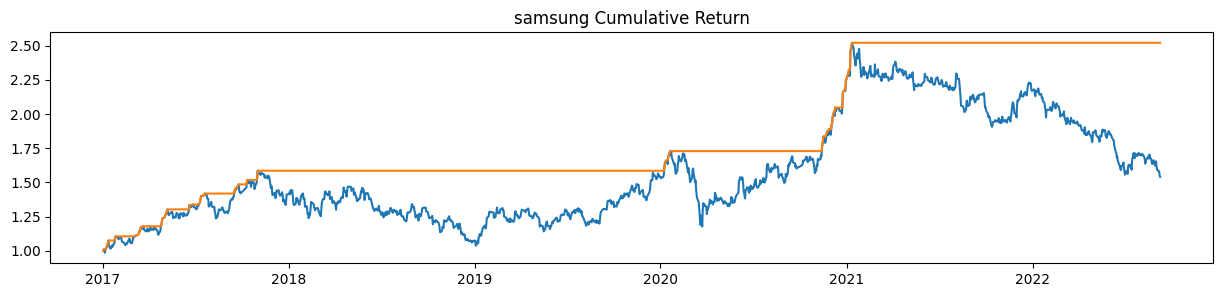

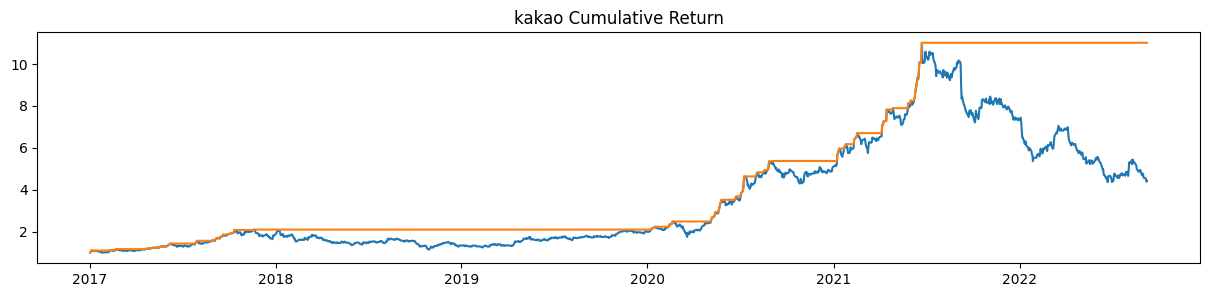

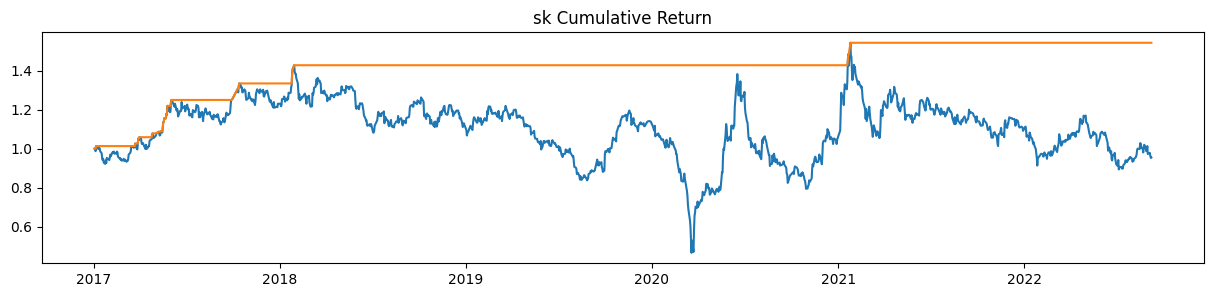

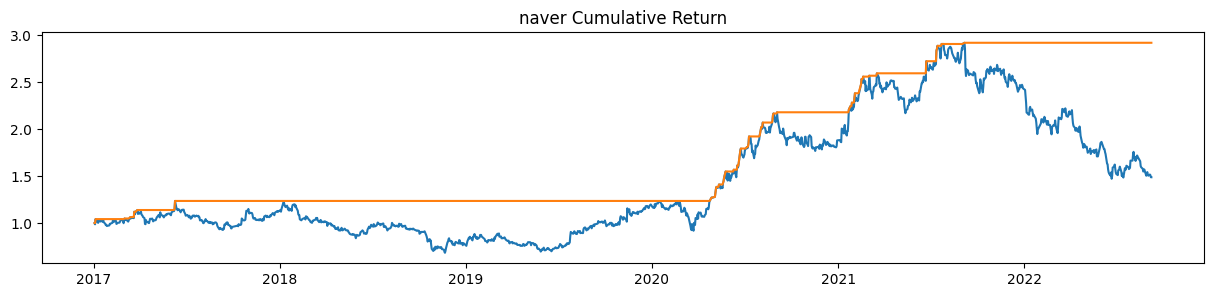

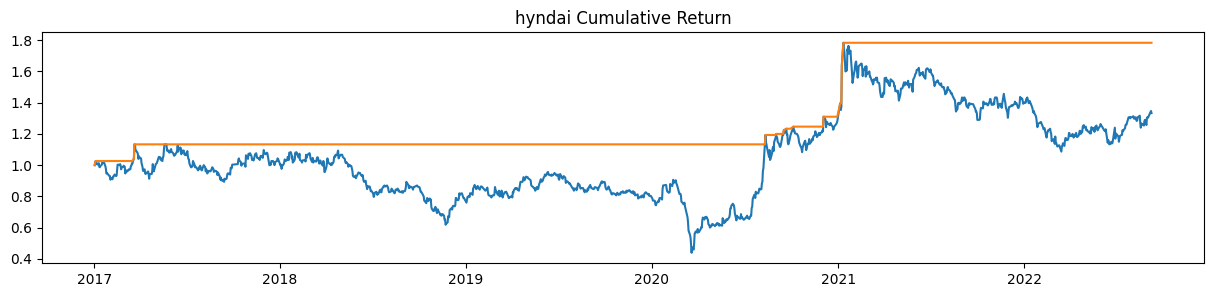

In [43]:
def PlotCumulativeRet(item):
    _ , ax = plt.subplots(figsize=(15, 3))
    ax.set_title(item[0] + " Cumulative Return")
    plt.plot(item[1], label="Cumulative Return")
    plt.plot(item[2], label="Cumulative Max")

plt.figure(figsize=(15, 3))
cumplot = map(PlotCumulativeRet, zip(StockNames, cumulativeReturn, cumulativeReturnMax))
cumplot = list(cumplot)


<Figure size 1500x300 with 0 Axes>

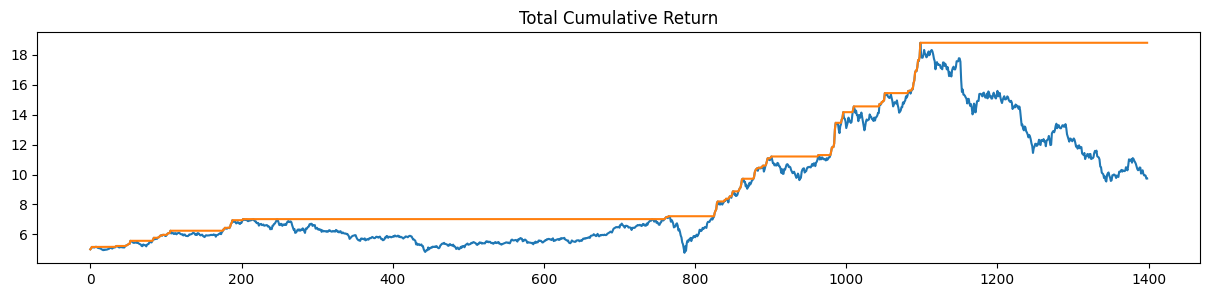

In [58]:
totalCumulativeRet = map(sum, zip(cumulativeReturn[0], cumulativeReturn[1], cumulativeReturn[2], cumulativeReturn[3], cumulativeReturn[4]))
totalCumulativeRet = list(totalCumulativeRet)
totalCumulativeRet = pd.DataFrame(data=totalCumulativeRet)
totalCumulativeRetMax = totalCumulativeRet.cummax()
plt.figure(figsize=(15, 3))
_, ax = plt.subplots(figsize=(15, 3))
ax.set_title("Total Cumulative Return")
plt.plot(totalCumulativeRet, label="Total Cumulative Return")
plt.plot(totalCumulativeRetMax, label="Totalcumulative Return Max")


In [89]:
def GetDD(cumRet):
    return (cumRet.cummax() - cumRet) / cumRet.cummax() * 100

drawdown = map(GetDD, cumulativeReturn)
drawdown = list(drawdown)

maxdrawdown = [d.cummax() for d in drawdown]
maxdrawdown

[Date
 2017-01-02     0.000000
 2017-01-03     0.000000
 2017-01-04     0.877193
 2017-01-05     2.521930
 2017-01-06     2.521930
                 ...    
 2022-09-02    38.241758
 2022-09-05    38.241758
 2022-09-06    38.241758
 2022-09-07    38.461538
 2022-09-08    38.901099
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02     0.000000
 2017-01-03     0.000000
 2017-01-04     0.000000
 2017-01-05     0.354610
 2017-01-06     0.709220
                 ...    
 2022-09-02    60.412979
 2022-09-05    60.412979
 2022-09-06    60.412979
 2022-09-07    60.412979
 2022-09-08    60.412979
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02     0.000000
 2017-01-03     0.434783
 2017-01-04     1.304348
 2017-01-05     1.304348
 2017-01-06     1.304348
                 ...    
 2022-09-02    67.427702
 2022-09-05    67.427702
 2022-09-06    67.427702
 2022-09-07    67.427702
 2022-09-08    67.427702
 Name: Close, Length: 1399, dtype: float64,
 Date
 2017-01-02     0.0

<Figure size 1500x300 with 0 Axes>

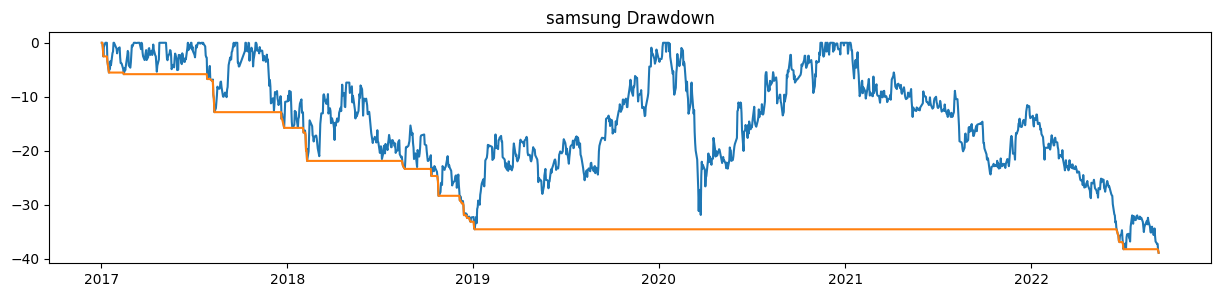

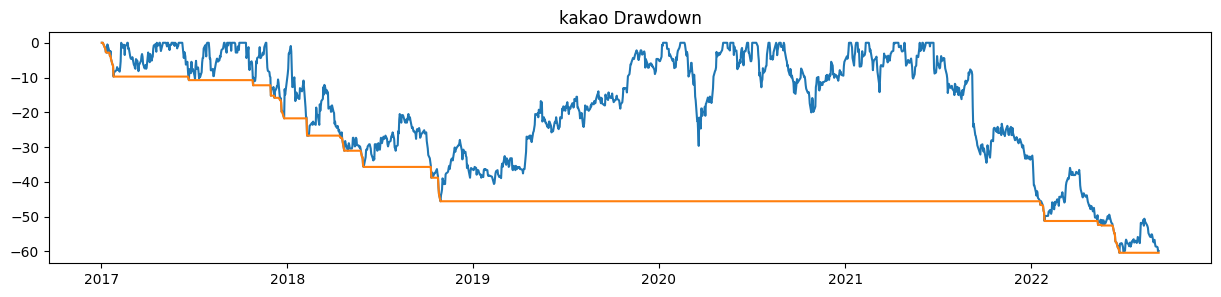

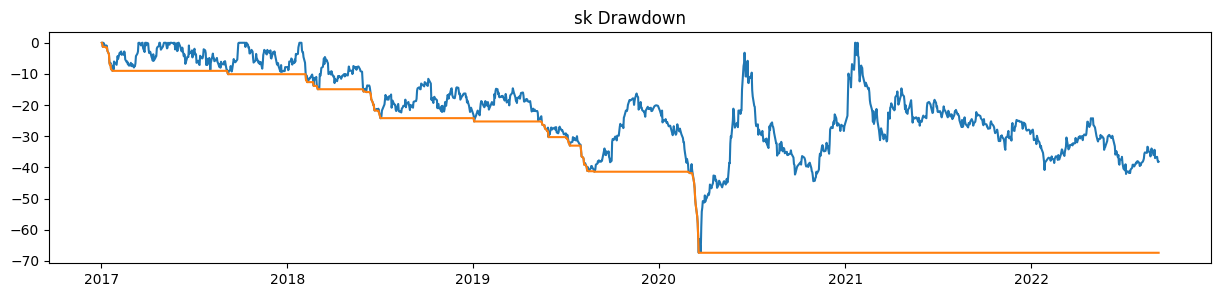

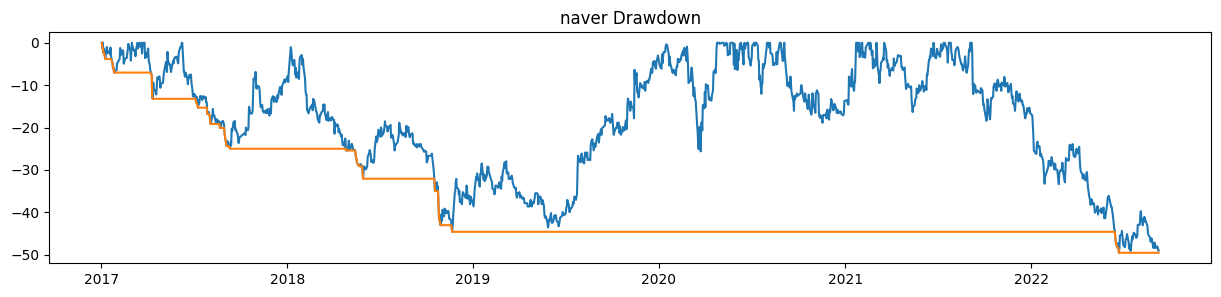

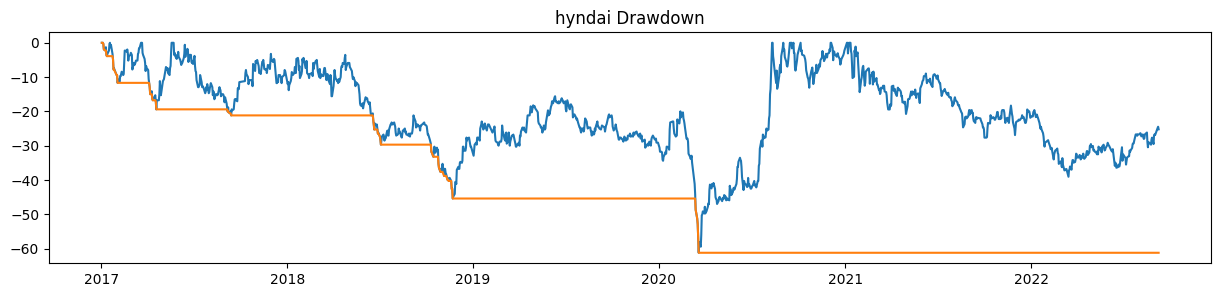

In [91]:
def PlotDrawDown(item):
    _ , ax = plt.subplots(figsize=(15, 3))
    ax.set_title(item[0] + " Drawdown")
    plt.plot(-item[1], label="Drawdown")
    plt.plot(-item[2], label="Cumulative Max")
    
plt.figure(figsize=(15, 3))
ddplot = map(PlotDrawDown, zip(StockNames, drawdown, maxdrawdown))
ddplot = list(ddplot)

    

In [62]:
maxdrawdown = [dd.max() for dd in drawdown]
maxdrawdown

[38.90109890109888,
 60.41297935103253,
 67.42770167427703,
 49.559471365638785,
 61.23529411764712]

In [65]:
data = pd.DataFrame()
for item in StockItems:
    data = pd.concat([data, item["Close"]], axis=1)

data.columns = ["samsung", "kakao", "SK", "Naver", "Hyundai"]
data

,samsung,kakao,SK,Naver,Hyundai
2017-01-02,36100,15394,230000,155620,150000
2017-01-03,36480,16057,229000,153617,153000
2017-01-04,36160,16920,227000,162230,154000
2017-01-05,35560,16860,233000,158424,153500
2017-01-06,36200,16800,232500,160026,151000
...,...,...,...,...,...
2022-09-02,57500,70200,224500,234000,196500
2022-09-05,57100,70000,225000,236000,200000
2022-09-06,57100,69700,221000,235000,201000
2022-09-07,56000,67500,219000,231500,202000


In [67]:
dayReturn = (data / data.shift(1)).fillna(1)
dayReturn

,samsung,kakao,SK,Naver,Hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,0.995652,0.987129,1.020000
2017-01-04,0.991228,1.053746,0.991266,1.056068,1.006536
2017-01-05,0.983407,0.996454,1.026432,0.976539,0.996753
2017-01-06,1.017998,0.996441,0.997854,1.010112,0.983713
...,...,...,...,...,...
2022-09-02,0.984589,0.983193,1.004474,0.991525,1.005115
2022-09-05,0.993043,0.997151,1.002227,1.008547,1.017812
2022-09-06,1.000000,0.995714,0.982222,0.995763,1.005000
2022-09-07,0.980736,0.968436,0.990950,0.985106,1.004975


In [68]:
cumReturn = data / data.iloc[0]
cumReturn

,samsung,kakao,SK,Naver,Hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,0.995652,0.987129,1.020000
2017-01-04,1.001662,1.099130,0.986957,1.042475,1.026667
2017-01-05,0.985042,1.095232,1.013043,1.018018,1.023333
2017-01-06,1.002770,1.091334,1.010870,1.028313,1.006667
...,...,...,...,...,...
2022-09-02,1.592798,4.560218,0.976087,1.503663,1.310000
2022-09-05,1.581717,4.547226,0.978261,1.516515,1.333333
2022-09-06,1.581717,4.527738,0.960870,1.510089,1.340000
2022-09-07,1.551247,4.384825,0.952174,1.487598,1.346667


In [70]:
portWeight = [1/len(data.columns)] * len(data.columns)
portWeight

[0.2, 0.2, 0.2, 0.2, 0.2]

In [71]:
portCumReturn = (portWeight * cumReturn).sum(axis=1)
portCumReturn

2017-01-02    1.000000
2017-01-03    1.011275
2017-01-04    1.031378
2017-01-05    1.026934
2017-01-06    1.027991
                ...   
2022-09-02    1.988553
2022-09-05    1.991410
2022-09-06    1.984083
2022-09-07    1.944502
2022-09-08    1.946550
Length: 1399, dtype: float64

In [72]:
portDayReturn = (portCumReturn / portCumReturn.shift(1)).fillna(1)
portDayReturn

2017-01-02    1.000000
2017-01-03    1.011275
2017-01-04    1.019879
2017-01-05    0.995691
2017-01-06    1.001029
                ...   
2022-09-02    0.989577
2022-09-05    1.001437
2022-09-06    0.996320
2022-09-07    0.980051
2022-09-08    1.001053
Length: 1399, dtype: float64

samsung
cagr: 1.0809019472154229
mdd: 38.901098901098905
kakao
cagr: 1.3068066793980364
mdd: 60.41297935103245
SK
cagr: 0.9916184369965164
mdd: 67.42770167427702
Naver
cagr: 1.0741615380466498
mdd: 49.55947136563877
Hyundai
cagr: 1.0531859277990745
mdd: 61.23529411764706
portfolio
cagr: 1.1274700802247333
mdd: 49.32383184035618


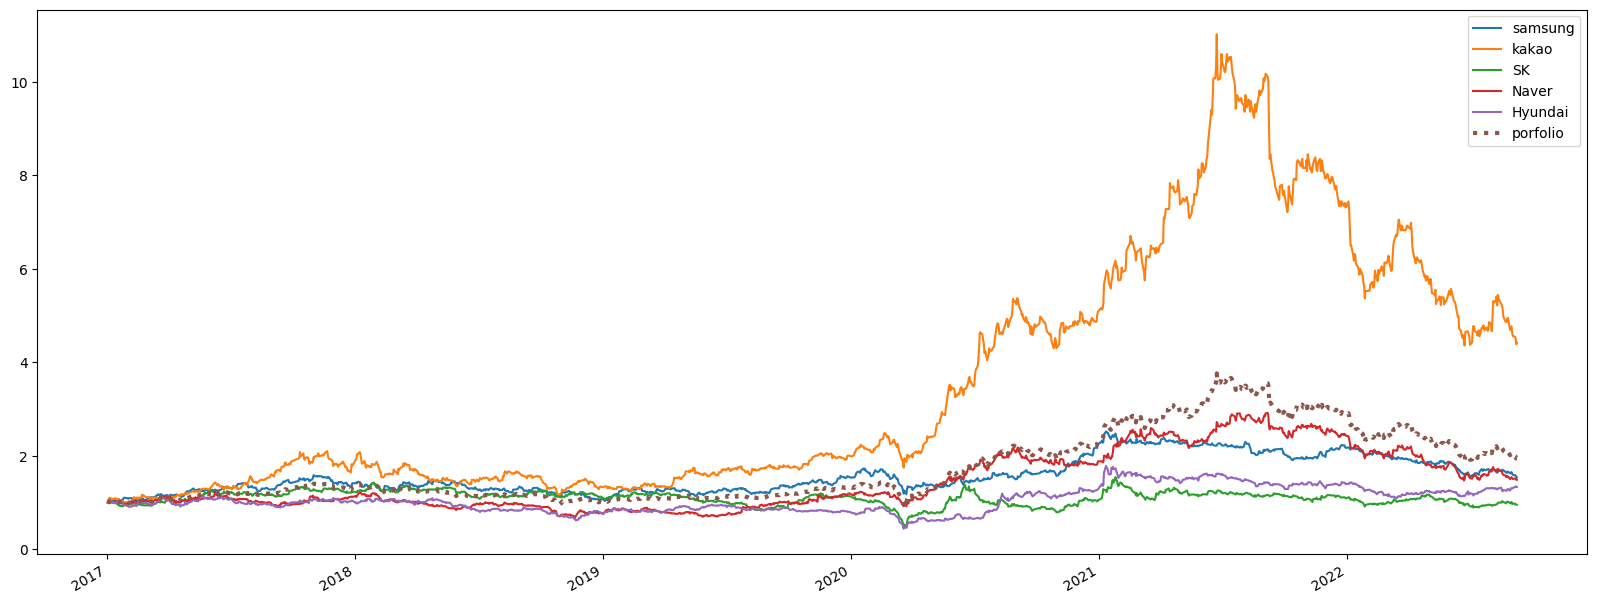

In [73]:
plt.figure(figsize=(20, 8))

for stock in cumReturn.columns:
    # 그래프
    cumReturn[stock].plot(label=stock)
    # cagr
    cagr = cumReturn[stock].iloc[-1] ** (252/len(cumReturn[stock]))
    # mdd
    dd = (cumReturn[stock].cummax() - cumReturn[stock]) / cumReturn[stock].cummax() * 100
    
    mdd= dd.max()
    
    print(stock)
    print(f"cagr: {cagr}\nmdd: {mdd}")
    print("=======")  

# cagr
cagr = portCumReturn.iloc[-1] ** (252/len(portCumReturn))
# mdd
dd = (portCumReturn.cummax() - portCumReturn) / portCumReturn.cummax() * 100
mdd= dd.max()

print("portfolio")
print(f"cagr: {cagr}\nmdd: {mdd}")
print("=======")

portCumReturn.plot(label = "porfolio", linestyle="dotted", linewidth=3)
plt.legend()
plt.show()